In [3]:
#데이터 구성
import pandas as pd

#행렬 연산
import numpy as np

#데이터 시각화
import matplotlib; import matplotlib.pyplot as plt

#데이터 시각화 산점도 행렬, 추세
import seaborn as sns

#scale 변환 평균 표준편차 기준
from sklearn.preprocessing import StandardScaler

#주성분 분석
from sklearn.decomposition import PCA

#회귀 분석
import statsmodels.api as sm

#폰트적용
matplotlib.rc('font', family="NanumBarunGothic")

In [157]:
df['SalesYearMonth']=df['SalesDate'].str[0:7]
df['SalesYearMonth']
df['SalesYear']=df['SalesDate'].str[0:4]
df['SalesYear']
df['SalesMonth']=df['SalesDate'].str[5:7]
df['SalesMonth']
# 습도분리
def Humidity(x):
        if  25>x: return '0'
        elif x >= 25 and x <30: return '1'  
        elif x >= 30 and x <60: return '2'
        elif x >= 60 and x <70: return '3' 
        else: return '4'
df['습도상태']=df['HumidAvg'].apply(Humidity)
df["습도상태"]

# 강수량 분리
def RainfallAmount(x):
        if  1>x: return '0'
        elif x >= 1 and x <3: return '1'  
        elif x >= 3 and x <15: return '2'
        elif x >= 15 and x <30: return '3' 
        else: return '4'
df['강수상태']=df['RainfallAmount'].apply(RainfallAmount)
df['강수상태']

1840      0
1841      0
1842      1
1843      1
1844      2
         ..
517114    0
517115    0
517116    0
517117    0
517118    0
Name: 강수상태, Length: 434129, dtype: object

In [5]:
df=pd.read_csv('//home/piai/바탕화면/df.csv',encoding='cp949')
df

,idUser,idPOS,SalesDate,SalesDow,SalesHour,ItemName,Gender,AgeGroup,ItemNameMiddle,Price,TempAvg,TempMin,TempMax,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,ItemNameLarge
0,U100001,U100001-POS2020-10001,2020-01-01,수요일,10,CJ)고메모짜돈카츠450g,남성,40대,가공식사,10000,-2.2,-6.5,0.3,9.83,0.1,64.4,0.0,식품
1,U100001,U100001-POS2020-10001,2020-01-01,수요일,10,롯)칠성사이다복숭아P500,남성,40대,음료,2200,-2.2,-6.5,0.3,9.83,0.1,64.4,0.0,음료
2,U100001,U100001-POS2020-10001,2020-01-01,수요일,10,PSK)스윗사파이어포도400g,남성,40대,식재료,6800,-2.2,-6.5,0.3,9.83,0.1,64.4,0.0,식품
3,U100001,U100001-POS2020-10004,2020-01-05,일요일,19,오뚜기)물엿700g,남성,40대,식재료,3000,1.3,-3.2,6.6,0.00,0.0,45.6,NaN,식품
4,U100001,U100001-POS2020-10004,2020-01-05,일요일,19,22del)헤이즐넛향1L,남성,40대,아이스링크,3500,1.3,-3.2,6.6,0.00,0.0,45.6,NaN,음료
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517940,U100831,U100831-POS2021-10299,2021-09-10,금요일,15,현대)갈릭페스츄리오징어,남성,30대,안주류,3000,23.6,19.5,28.9,0.00,0.0,76.0,NaN,식품
517941,U100831,U100831-POS2021-10299,2021-09-10,금요일,15,길림)와사비맛아몬드40g,남성,30대,안주류,2000,23.6,19.5,28.9,0.00,0.0,76.0,NaN,식품
517942,U100831,U100831-POS2021-10299,2021-09-10,금요일,15,신)고구마치아바타피자,남성,30대,가공식사,3400,23.6,19.5,28.9,0.00,0.0,76.0,NaN,식품
517943,U100831,U100831-POS2021-10302,2021-09-12,일요일,9,CJ)오곡참깨드레싱105g,남성,30대,식재료,1600,24.2,19.2,29.8,0.00,0.0,64.6,NaN,식품


In [52]:
a=df[df['AgeGroup']=='20대']
b=df[df['AgeGroup']=='30대']
c=df[df['AgeGroup']=='40대']
df= pd.concat([a,b,c], axis = 0)
df

,idUser,idPOS,SalesDate,SalesDow,SalesHour,ItemName,Gender,AgeGroup,ItemNameMiddle,Price,...,TempMin,TempMax,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,ItemNameLarge,SalesYearMonth,SalesYear,SalesMonth
1840,U100833,U100833-POS2020-10007,2020-04-08,수요일,19,CJ)뚝배기불고기양념150g,여성,20대,식재료,1900,...,5.2,14.2,0.00,0.0,25.5,NaN,식품,2020-04,2020,04
1841,U100833,U100833-POS2020-10007,2020-04-08,수요일,19,만인산)매운고추200g,여성,20대,식재료,2000,...,5.2,14.2,0.00,0.0,25.5,NaN,식품,2020-04,2020,04
1842,U100833,U100833-POS2020-10009,2020-05-08,금요일,16,엠즈)데르뜨초콜릿케이크,여성,20대,빵/디저트,3600,...,14.3,27.3,6.17,2.3,32.8,NaN,과자류,2020-05,2020,05
1843,U100833,U100833-POS2020-10009,2020-05-08,금요일,16,팜덕)허브갈릭훈제오리,여성,20대,안주류,5000,...,14.3,27.3,6.17,2.3,32.8,NaN,식품,2020-05,2020,05
1844,U100833,U100833-POS2020-10011,2020-06-10,수요일,12,동원)메추리알장조림,여성,20대,식재료,3900,...,22.5,32.1,6.58,6.2,63.8,NaN,식품,2020-06,2020,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517114,U100830,U100830-POS2021-10622,2021-12-30,목요일,11,예스)트롤리키스,남성,40대,껌/초콜릿/캔디,2000,...,-6.8,0.2,0.50,0.0,48.5,NaN,과자류,2021-12,2021,12
517115,U100830,U100830-POS2021-10622,2021-12-30,목요일,11,삼립)촉촉치즈후레쉬팡,남성,40대,빵/디저트,2000,...,-6.8,0.2,0.50,0.0,48.5,NaN,과자류,2021-12,2021,12
517116,U100830,U100830-POS2021-10624,2021-12-31,금요일,7,MDS)사천마라훠거탕면컵,남성,40대,가공식사,2500,...,-8.8,-3.9,0.00,0.0,35.9,NaN,식품,2021-12,2021,12
517117,U100830,U100830-POS2021-10624,2021-12-31,금요일,7,PSK)프리미엄체리400g,남성,40대,식재료,8500,...,-8.8,-3.9,0.00,0.0,35.9,NaN,식품,2021-12,2021,12


/home/piai/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/piai/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


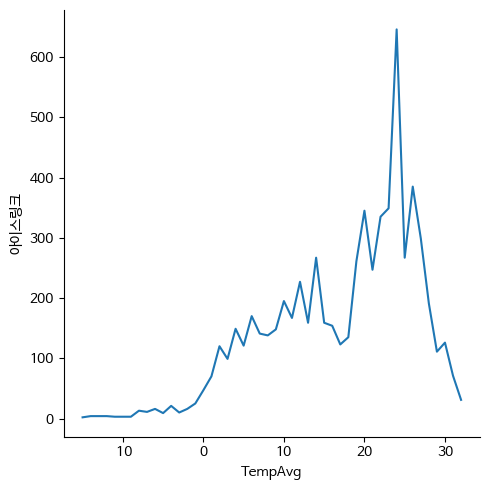

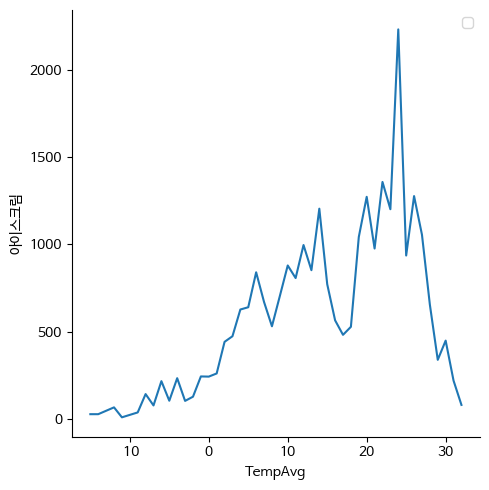

In [135]:
pivot1 =pd.pivot_table(data=df, index=df['TempAvg'].round(0),columns='ItemNameMiddle', values='Price',aggfunc='count')
pivot1
sns.relplot(x='TempAvg',y='아이스링크',data=pivot1, kind='line',ci=None)
sns.relplot(x='TempAvg',y='아이스크림',data=pivot1, kind='line',ci=None)
plt.legend()

/home/piai/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/piai/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


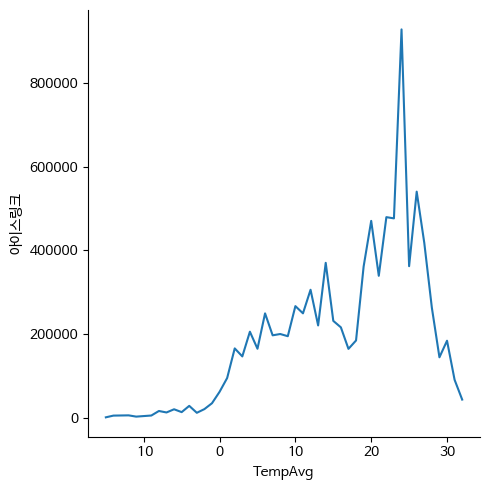

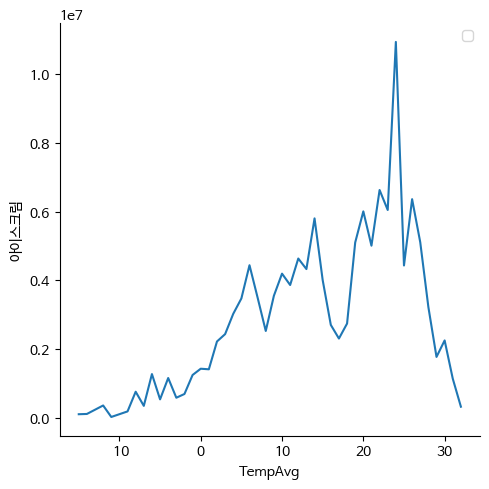

In [136]:
pivot1 =pd.pivot_table(data=df, index=df['TempAvg'].round(0),columns='ItemNameMiddle', values='Price',aggfunc='sum')
pivot1
sns.relplot(x='TempAvg',y='아이스링크',data=pivot1, kind='line',ci=None)
sns.relplot(x='TempAvg',y='아이스크림',data=pivot1, kind='line',ci=None)
plt.legend()

In [140]:
b= pd.crosstab(df['ItemNameMiddle'],df['AgeGroup'],values=(df[df['SalesYear']=='2020']['Price']),aggfunc='sum').style.background_gradient()
b

AgeGroup,20대,30대,40대
ItemNameMiddle,,,
가공식사,48677270.000000,55898520.000000,37304100.000000
껌/초콜릿/캔디,11236300.000000,13272350.000000,8474950.000000
도시락,8240300.000000,9574000.000000,6275700.000000
베이커리,1070200.000000,1155500.000000,794100.000000
빵/디저트,17602590.000000,20195970.000000,13666930.000000
샌드위치/햄버거,7256800.000000,8188400.000000,5971800.000000
스낵/비스켓,14008800.000000,16371900.000000,10703400.000000
식재료,39902990.000000,45401930.000000,31230820.000000
아이스링크,1540200.000000,1667400.000000,1075800.000000


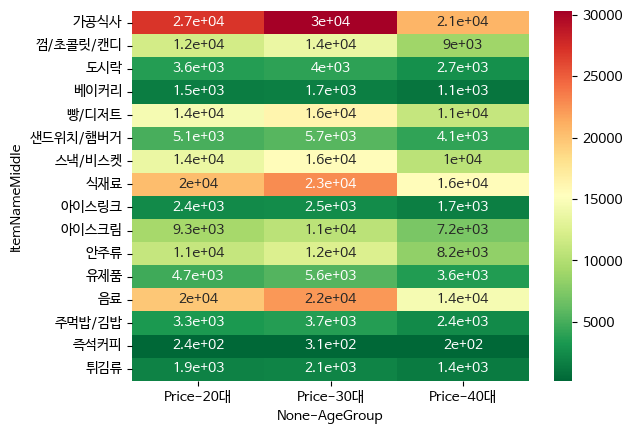

In [177]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['AgeGroup'],values=['Price'],aggfunc='count')
pivot
sns.heatmap(pivot,cmap='RdYlGn_r',annot=True)
plt.show()

In [ ]:
# 그룹바이를 한다, 고객기준 포스카운트센다
# IQR로 나누기
# 1년에 몇회로 나누기 1234등급
df.groupby('idUSer')[]

In [153]:
pivot =pd.pivot_table(data=df, index=df[df['ItemNameMiddle']=='안주류']['ItemNameMiddle'],
                      columns=['SalesYearMonth'],values=['Price'],aggfunc='count')
pivot

Price                                                  \
SalesYearMonth 2020-01 2020-02 2020-03 2020-04 2020-05 2020-06 2020-07   
ItemNameMiddle                                                           
안주류                838     634     868    1185    1466    1410    1549   

                                        ...                                  \
SalesYearMonth 2020-08 2020-09 2020-10  ... 2021-03 2021-04 2021-05 2021-06   
ItemNameMiddle                          ...                                   
안주류               1682    1484    1764  ...    1027    1270    1558    1544   

                                                                
SalesYearMonth 2021-07 2021-08 2021-09 2021-10 2021-11 2021-12  
ItemNameMiddle                                                  
안주류               1738    1753    1665    1729    1347    1381  

[1 rows x 24 columns]

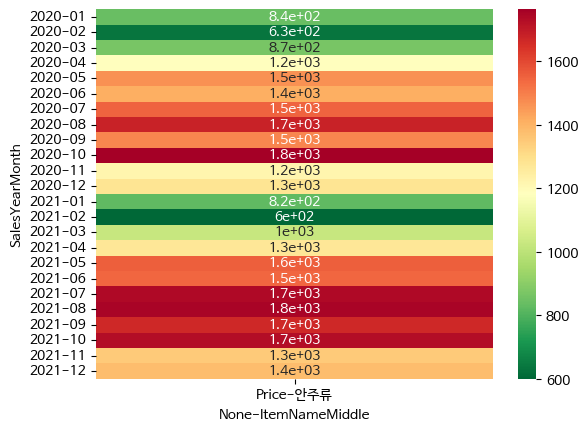

In [155]:
pivot =pd.pivot_table(data=df, columns=df[df['ItemNameMiddle']=='안주류']['ItemNameMiddle'],
                      index=['SalesYearMonth'],values=['Price'],aggfunc='count')
pivot
sns.heatmap(pivot,cmap='RdYlGn_r',annot=True)
plt.show()

In [ ]:
pivot =pd.pivot_table(data=df, columns=df[df['ItemNameMiddle']=='안주류']['ItemNameMiddle'],
                      index=['SalesYearMonth'],values=['Price'],aggfunc='count')
pivot
sns.heatmap(pivot,cmap='RdYlGn_r',annot=True)
plt.show()

In [175]:
df['강수상태'].value_counts()

0    332370
2     44576
1     26722
4     18438
3     12023
Name: 강수상태, dtype: int64

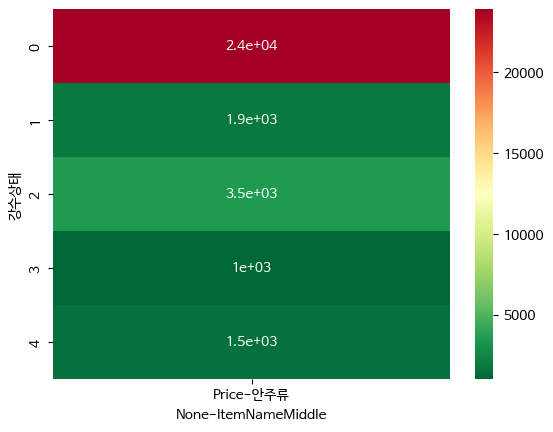

In [176]:
pivot =pd.pivot_table(data=df, columns=df[df['ItemNameMiddle']=='안주류']['ItemNameMiddle'],
                      index=['강수상태'],values=['Price'],aggfunc='count')
pivot
sns.heatmap(pivot,cmap='RdYlGn_r',annot=True)
plt.show()

In [158]:
b= pd.crosstab(df['강수상태'],df['ItemNameMiddle'],values=(df[df['SalesYear']=='2020']['Price']),aggfunc='sum').style.background_gradient()
b

ItemNameMiddle,가공식사,껌/초콜릿/캔디,도시락,베이커리,빵/디저트,샌드위치/햄버거,스낵/비스켓,식재료,아이스링크,아이스크림,안주류,유제품,음료,주먹밥/김밥,즉석커피,튀김류
강수상태,,,,,,,,,,,,,,,,
0,109911990.000000,25637000.000000,18685200.000000,2375300.000000,39764670.000000,16722500.000000,31992500.000000,90295300.000000,3257200.000000,45936000.000000,48023000.000000,9508670.000000,44430300.000000,6694900.000000,1386900.000000,5191300.000000
1,9957090.000000,2382300.000000,1729700.000000,234800.000000,3559860.000000,1511600.000000,2907800.000000,7974450.000000,290900.000000,4399700.000000,4206400.000000,799180.000000,4002200.000000,547600.000000,93800.000000,522700.000000
2,10455000.000000,2371700.000000,1751800.000000,197800.000000,3927780.000000,1552500.000000,2946700.000000,8503600.000000,345000.000000,4917400.000000,4861400.000000,873680.000000,4295000.000000,582900.000000,111800.000000,494500.000000
3,3073460.000000,684800.000000,479600.000000,44500.000000,1070690.000000,366600.000000,835000.000000,2673580.000000,95100.000000,1566900.000000,1580200.000000,230750.000000,1365650.000000,164800.000000,3600.000000,122500.000000
4,8482350.000000,1907800.000000,1443700.000000,167400.000000,3142490.000000,1263800.000000,2402100.000000,7088810.000000,295200.000000,4001800.000000,4411300.000000,729930.000000,3782200.000000,580800.000000,143300.000000,301500.000000
